Professor advice:

Take note of which int methods chose and why

5.19 part e.2 is cancelled

In [31]:
import math
import cmath
import numpy as np
import pylab as plt
from scipy import integrate

%matplotlib inline

## 5.128970014

### a) 

Show that

$W = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3} \int^\infty_0 \frac{x^3}{(e^x - 1)} dx$

is the total energy per unit area radiated by a black body given

$I(\omega) = \frac{\hbar}{4\pi^2 c^2} \frac{\omega^3}{(e^{\hbar \omega / k_B T} - 1)}$

with $I(\omega) d\omega$ being the thermal energy radiated per second for a black body of unit area and angular frequency of $\omega$.



Set

$x = \frac{\hbar \omega}{k_B T}$ $dx = \frac{\hbar}{k_B T} d\omega$ meaning $\omega = \frac{k_B T x}{\hbar}$

then

$W = \int^\infty_0 I(\omega) d\omega = \int^\infty_0 \frac{\hbar}{4\pi^2 c^2} \frac{k_B T}{\hbar} \frac{(\frac{k_B T x}{\hbar})^3}{e^x - 1} dx = \frac{k_B^4 T^4}{4\hbar^3 \pi^2 c^2} \int^\infty_0 \frac{x^3}{e^x - 1} dx$

### b)

In [14]:
def blackBodyEnergy (temperature):
    """
    Description: Returns the total energy per unit area of a radiating black body at the given temperature
    
    Parameters: temperature - temperature for calculation
    
    Returned: energy radiated by black body per unit area 
    """
    
    def blackBodyEnergyIntegrand (xValue):
        """
        Description: Returns the integrand for the energy calculation
        
        Parameters: xValue - independant variable at which function is being calculated
        
        Returned: the integrand value evaluated at the given xValue
        """
        return xValue**3 * math.exp (-xValue) / (1 - math.exp (-xValue))
    
    boltzmannsConst = 1.38064852e-23 #m^2 kg s^-2 K^-1
    speedOfLight = 2.9979e8 #m s^-1
    hbar = 1.054572e-34 #m^2 kg s^-1
    numSamplePoints = 100
    
    x1 = 0
    x2 = np.inf
    integral, error = integrate.quad (blackBodyEnergyIntegrand, x1, x2)
    
    return integral * boltzmannsConst**4 * temperature**4 / (4 * math.pi**2 * speedOfLight**2 * hbar**3), error



I chose the gaussian quadrate integration method because this is a well behaved smooth integrand.

In [19]:
temperatureOfSun = 5778 #kelvin
energyOfSun, energyOfSunError = blackBodyEnergy (temperatureOfSun)
stefanBoltzmannConst = energyOfSun / temperatureOfSun**4

print ("W-value for the sun:", energyOfSun, "J per unit area")
print ("Error in W-value:", energyOfSunError, "J per unit area")
print ("Calculated Stefan-Boltzmann's constant:", stefanBoltzmannConst, "kg m^2/s^2 K^4")
print ("Known Stefan-Boltzmann's constant: 5.67036e-8 W/m^2 K^4")

W-value for the sun: 63201615.43789831 J per unit area
Error in W-value: 2.6284714908361187e-09 J per unit area
Calculated Stefan-Boltzmann's constant: 5.6704565759935693e-08 kg m^2/s^2 K^4
Known Stefan-Boltzmann's constant: 5.67036e-8 W/m^2 K^4



## Some notes on Newman's 5.19 - Diffraction Gratings
$w =$ the distance along the diffraction grating itself note that you will need a separate parameter for the screen width

$u =$ the distance up and down the diffraction grating itself. You integrate along it to find all of the light coming from the diffraction grating.

$x =$ distance along the SCREEN where the pattern is created (like the one in Newman) –

$q(u) =$ geometrical weight that takes into account superposition of light rays.

You could derive $q(u)$ with calculus (if someone hasn’t given it to you). Basically if you have a grating, you treat each opening like an individual point of light and calculate the pattern that will form on a distant screen – it makes a pattern since geometrically different light rays have different lengths, so they arrive at different phases – that may add or cancel depending on the length of each ray. I write about this in detail in Lab 4 solutions if you want to have a peak.

While it is fine to accept the value given as $q(u) = sin^2(\alpha u)$, you’re correct that doesn’t help you answer (a) where you want to find the spacing of the grating. For this, you can go look at an optics book, or you can be sneaky and back it out using a little logic/calculus/magic:

Notice that the function q(u) has zeros, $z$, find an expression for $z$ in terms of $\alpha$ (use trig here!!! There will be a $\pi$ in your answer).
These $z$ values are special cases of u that have the same periodicity as the geometrical pattern $q(u)$. So find the spacing between two z values, and you have found the slit separation
Since the spacing is a geometrical quantity that a machinist might make, you can take the spacing to be the independent variable and calculate $\alpha$ from it.
So you have to loop over all your $x-$values, and for each $x-$value add up all of the light coming from the entire diffraction grating. That is the picture Newman has given you – it shows all of the light hitting one particular $x-$value, but imagine the rest of the x-values having a similar picture, arising from a different set of light rays emanating from the diffraction grating.

### a)

The seperation of the the "slits" are given by $z=\frac{\pi}{a}$.

### b)

In [48]:
def q(u):
    """
    Description: Returns the transmission function given by sin^2 (\alpha * u)
    
    Parameters: u - independant variable at which function is being evaluated at
    
    Returned: returns the transmission function at the given u-value
    """
    alpha = spacing ()
    return math.sin (alpha * u)**2    

def spacing ():
    seperation = 20e-6 # metres
    return math.pi / seperation # metres^-1

In [56]:
def intensityDiffractionPattern (qFunc):
    wavelength = 500e-9 # m
    focalLength = 1 # m
    screenWidth = 0.1 # m
    numSlits = 10
    u1 = -200e-6 / 2
    u2 = 200e-6 / 2
        
    numSamplePoints = 1000
    xValues = np.linspace (-screenWidth / 2, screenWidth / 2, numSamplePoints)
    intensityValues = []
    
    def integrand (uValue, xValue):
        return math.sqrt (qFunc(uValue)) * cmath.exp (complex (0, 2 * cmath.pi * xValue * uValue / (wavelength) * focalLength))
    
    def simpson (func, xValue, numSteps, u1, u2):
        h = (u2 - u1) / numSteps
        sum = func (u1, xValue) + func (u2, xValue)

        for i in range (int (numSteps / 2)):
            sum += 4 * func (u1 + (2 * i - 1) * h, xValue) #odd terms
            sum += 2 * func (u1 + 2 * i * h, xValue) #even terms
        return sum * h / 3
    
    for x in xValues:
        intensityValues.append (abs (simpson (integrand, x, numSamplePoints, u1, u2))**2)
    
    return xValues, intensityValues
    


**graph**

In [60]:
xValues, intensityValues = intensityDiffractionPattern(q)

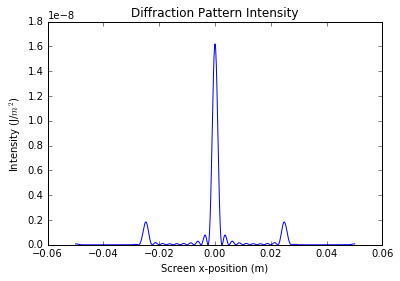

In [61]:
plt.title ("Diffraction Pattern Intensity")
plt.xlabel ("Screen x-position (m)")
plt.ylabel (r"Intensity (J/$m^2$)")
plt.plot (xValues, intensityValues)
plt.show ()

### e)

In [58]:
def q2(u):
    """
    Description: Returns the transmission function given by sin^2 (\alpha * u) * sin^2 (\beta * u)
    
    Parameters: u - independant variable at which function is being evaluated at
    
    Returned: returns the transmission function at the given u-value
    """
    alpha = spacing ()
    beta = alpha / 2
    return math.sin (alpha * u)**2 * math.sin (beta * u)**2

In [62]:
xValues, intensityValues = intensityDiffractionPattern(q2)

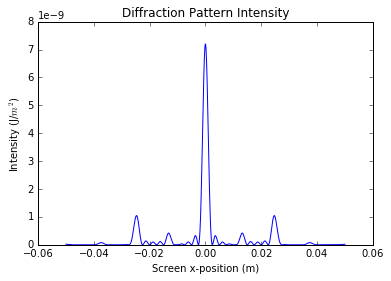

In [63]:
plt.title ("Diffraction Pattern Intensity")
plt.xlabel ("Screen x-position (m)")
plt.ylabel (r"Intensity (J/$m^2$)")
plt.plot (xValues, intensityValues)
plt.show ()